# Kelompok 1
     1. Agustinus Yulius Bagus(09011281924078)
     2. Anggita Putri Anti(09011281924149)
     3. Jumiati(09011181924145)
     4. Gregorius Jose Mahesa Irawan(09011281924068)
     5. Gita Cahyani(09011281924147)
     6. Megi Fitriyanto(09011281924056)
     7. Pitria Putri Sari(09011281924143)
     8. Sri Nadhila(09011181924153)
     9. Yuni Tri Lestari(09011181924154)

Di dalam ilmu komputasi, __Particle Swarm Optimization__ (PSO) merupakan metode komputasi yang mengoptimalkan masalah dengan mencoba secara iteratif untuk meningkatkan solusi calon dengan mengukur kualitas yang diberikan.

Algoritma ini mengoptimasi permasalahan dengan cara menggerakan partikel / calon solusi di dalam ruang permasalahan menggunakan fungsi tertentu untuk posisi dan kecepatan dari partikel. Pergerakan partikel dipengaruhi oleh solusi terbaik partikel tersebut, dan solusi terbaik secara umum yang didapatkan dari partikel lain. Sekumpulan partikel ini dinamakan __swarm__, dan pada akhirnya swarm ini akan bergerak menuju kepada solusi terbaik.

__PSO__ awalnya dikaitkan dengan Kennedy, Eberhart dan Shi dan pertama kali dimaksudkan untuk mensimulasikan perilaku sosial, sebagai representasi gaya dari pergerakan organisme dalam kawanan burung atau sekumpulan ikan. Algoritma disederhanakan dan diamati melakukan optimasi. Buku oleh Kennedy dan Eberhart menjelaskan banyak aspek filosofis PSO dan kecerdasan swarm. 

sumber:

https://en.wikipedia.org/wiki/Particle_swarm_optimization
https://piptools.net/algoritma-pso-particle-swarm-optimization/#:~:text=Particle%20Swarm%20Optimization%20adalah%20teknik%20optimasi%20dengan%20cara,fungsi%20tertentu%20untuk%20posisi%20dan%20kecepatan%20dari%20partikel.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt # Library yang digunakan untuk membuat garis kordinat ploting data.
import numpy as np # Memiliki kegunaan untuk operasi vektor dan matriks.
from mpl_toolkits import mplot3d #untuk menampilkan ploting data secara 3D.
from matplotlib.animation import FuncAnimation # Untuk membuat animasi perubahan posisi yang ditampilkan pada figur di bawah.


In [2]:
def f(x, y):
    return -np.sin(np.sqrt(x ** 2 + y ** 2))/np.sqrt(x ** 2 + y ** 2)

x = np.linspace(-20, 20, 80)
y = np.linspace(-20, 20, 80)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')


<IPython.core.display.Javascript object>

Kami mencoba menemukan min dari fungsi ini 
> __def__ adalah Sebuah fungsi bisa menerima parameter, bisa mengembalikan suatu nilai, dan bisa dipanggil berkali-kali secara independen, di dalam program ada 2 parameter yang di inisiasikan yaitu x dan y.

> return memiliki fungsi untuk mengembalikan nilai

> __np__ atau __numpy__  merupakan salah satu library yang disediakan oleh Python dalam memudahkan operasi komputasi tipe data numerik dan NumPy menyediakan ufunc sin(), cos() dan tan() yang mengambil nilai dalam radian dan menghasilkan nilai sin, cos, dan tan yang seharusnya seperti yang tertera pada kodingan mempai fungsi nampy : -np.sin.

> inisialisasi parameter x dan y dengan fungsi np.linspace, Fungsi numpy.linspace() mengembalikan spasi angka secara merata dengan interval w.r.t. Mirip dengan fungsi numpy.arrange() tetapi alih-alih langkah itu menggunakan nomor sampel.

> np.meshgrid Tujuannya adalah untuk membuat kotak persegi panjang dari array nilai x dan array nilai y.

Jadi, misalnya, jika kita ingin membuat kisi di mana kita memiliki titik pada setiap nilai integer antara 0 dan 4 di kedua arah x dan y. Untuk membuat kisi persegi panjang, kita membutuhkan setiap kombinasi dari xdan ytitik.
> lalu tampilkan plot dengan menggunakan fungsi __ax.plot_surface__

In [3]:
# mendefinisikan masalah

def costFunction(pos):
    x = pos[0] #variabel x diisi terlebih dahulu dengan data yang ada di pos(parameter) pada index ke 0
    y = pos[1] #variabel x diisi terlebih dahulu dengan data yang ada di pos(parameter) pada index ke 1
    return -np.sin(np.sqrt(x ** 2 + y ** 2))/np.sqrt(x ** 2 + y ** 2)
    # fungsi return untuk mengembalikan nilai dari sin tetapi secara terbalik dikarenakan nilainya negatif dengan rumus 
    # nilai terbalik dari sin akar dari (x^2 + y^2)/akar dari(x^2 + y^2) 


VarSize = 2  # dimensi dari variabel yaitu[x,t] dimension of variable [x,y]
VarMin = -40 # limit minimal untuk point dan plot 
VarMax =  40 # limit maksimal untuk point dan plot


In [4]:
# Parameter untuk PSO
maxItr = 100  # Maksimum perulangan yang bisa dilakukan
nPop  = 10    # Banyaknya populasi atau jumlah poin

w  = 0.5 # Koefisien inertia
c1 = 1   # Koefisien akselerasi personal
c2 = 1   # Koefisien akselerasi social

Gcosts = maxItr*[0] # keeping track of all global bests


Beberapa parameter diatas akan digunakan pada fungsi CalculateVelocity. Inertia weight di simbolkan w, parameter ini digunakan untuk mengontrol dampak dari adanya velocity yang diberikan oleh suatu particle. Inertia weight yang besar dapat memudahkan dalam penelusuran global sedangkan inertia weight yang kecil memudahkan untuk penelusuran local. Penggunaan inertia weight dapat meningkatkan performansi dalam beberapa aplikasi, ketika menggunakan inertia weight faktor velocity maksimum dapat menjadi sederhana yang diset dengan nilai pada rentang dinamis dari setiap variable biasanya antara 0.4 sampai 0.9.

Pada umumnya nilai-nilai untuk koefisien akselerasi c1 dan c2 = 2.0. Namun demikian, nilai koefisien akselerasi tersebut dapat ditentukan sendiri. Biasanya nilai c1 dan c2 adalah sama dan berada pada rentang antara 0 sampai 4. 

In [5]:
#inisialisasi

class Point():
    #Membuat sebuah fingsi baru yaitu class dengan 
    def __init__(self, newPos, newCost, newVel):
        #Inisialisasi atribut untuk mendeskripsikan Point, 
        #init_()method, selain parameter self, didefinisikan 
        #tambahan lagi yaitu newPost, newCost, dan newVel.
        self.pos = newPos
        self.cost = newCost
        self.Ppos = newPos
        self.Pcost = newCost
        self.vel = newVel
        """ 
        Ketika membuat sebuat instance untuk sebuah Point baru, 
        kita perlu menentukan newPos, newCost, dan newVel untuk 
        instance tersebut
        """
        
    def updatePoint(self,newPos, newCost, newVel):
        """
        Setelah dilakukan inisialisasi atribut maka dibuatlah 
        def baru untuk melakukan updatePoint dengan parameter
        self, newPost, newCost, newVel atau parameter yang sudah 
        diinisialisasikan sebelumnya
        """
        if(newCost<self.Pcost):
            self.Ppos = newPos
            self.Pcost = newCost
        self.pos = newPos
        self.cost = newCost
        self.vel = newVel
        

Gpos = [0,0]  #Global best position
Gcost= 0      #Global Best value
points = []#particle list

#Perulangan untuk mencetak item (dengan nama variabel i) dalam range nPop.
for i in range(nPop):
    
    #yang dilakukan perulangan adalah proses-proses yang ada dibawah ini.
    #hasilkan posisi awal acak untuk mengetahui posisi terbaru partikel
    newPos = np.random.uniform(VarMin,VarMax,VarSize)
    
    #Evaluasi posisi saat ini atau setelah partikel di acak
    newCost = costFunction(newPos)
    
    #Inisialisasi kecepatan ke nol
    newVel = np.zeros(VarSize)
    
    newPoint = Point(newPos,newCost,newVel)

    #Menemukan posisi & nilai terbaik global dengan menggunakan pengkondisian
    if(i==0):
        Gpos = newPoint.pos
        Gcost= newPoint.cost
    else:
        if(newPoint.cost < Gcost):
            Gpos = newPoint.pos
            Gcost= newPoint.cost
    
    #tambahkan hasil variabel newPoint kedalam points
    points.append(newPoint)

In [6]:
def calculateVelocity(ptcl, w, c1, c2, Gpos, VarSize):
    r1 = np.random.rand(VarSize) # untuk distribusi Seragam (dalam interval setengah terbuka [0.0, 1.0))
    r2 = np.random.rand(VarSize) # untuk distribusi Seragam (dalam interval setengah terbuka [0.0, 1.0))
    C = np.array(ptcl.Ppos)-np.array(ptcl.pos) # memudahkan operasi komputasi tipe data numerik
    S = np.array(Gpos)-np.array(ptcl.pos)
    return (np.array(ptcl.vel)*w + c1*r1*C + c2*r2*S)

np.seterr('raise') # untuk Menaikkan FloatingPointError

G_posns = []  #All global best positions
G_costs = []  #All global best Values
for i in range(maxItr):
    #Variabel i berfungsi untuk menampung indeks, dan fungsi range() 
    #berfungsi untuk membuat list dengan range dari 0-10
    
    for j in range(nPop):
        oldPos = points[j].pos
        newVel = calculateVelocity(points[j],w,c1,c2,Gpos,VarSize)
        newPos = points[j].pos + newVel
        newCost = costFunction(newPos)
        
        if(newCost < Gcost):
            """
            disini akan memasukkan value berdasarkan logika jika newCost < Gcost
            maka masukkan nilai newPos ke dalam variabel Gpos dan newCost ke dalam
            variabel newCost
            """
            Gpos = newPos
            Gcost= newCost
            
        if(newCost<points[j].Pcost):
            points[j].Ppos = newPos
            points[j].Pcost = newCost
        points[j].pos = newPos
        points[j].cost = newCost
        points[j].vel = newVel
        
    G_posns.append(Gpos) # tambahkan hasil dari Gpos ke variabel G_posns
    G_costs.append(Gcost) # tambahkan hasil dari Gcost ke variabel G_posns
    
G_posns = np.array(G_posns)

In [10]:
plt.plot(G_costs, color='green') # plotting dengan axis dari G_costs

<IPython.core.display.Javascript object>


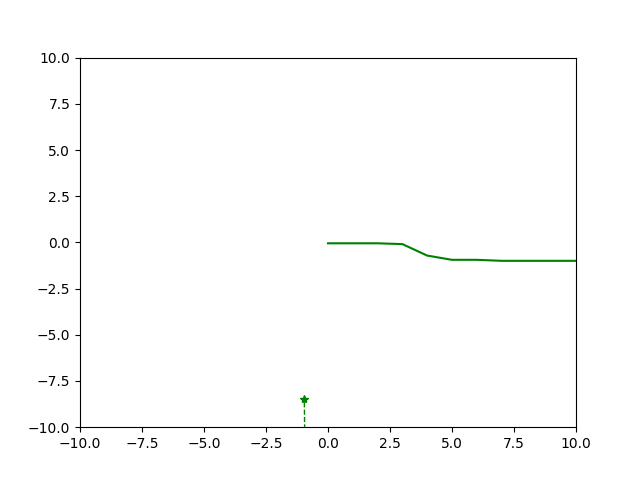

<ipython-input-9-82a974542977>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g*" (-> color='g'). The keyword argument will take precedence.
  ax, = plt.plot([], [],'g*',color='g',linestyle='dashed',linewidth=1 )


In [9]:
fig = plt.figure() #Membuat gambar baru
plt.xlim(-10, 10) #Menetapkan tampilan sumbu x (-10,10) sebagai default 
plt.ylim(-10, 10) #Menetapkan tampilan sumbu y (-10,10) sebagai default
ax, = plt.plot([], [],'g*',color='g',linestyle='dashed',linewidth=1 )
#Membuat isi dari plot dengan simbol bintang dan garis putus-putus

plt.grid()
plt.grid()

#Membuat fungsi animate(i)
def animate(i):
    global G_posns #Mengubah nilai global G_posns
    ax.set_data(G_posns[:i,0], G_posns[:i,1]) #Set data untuk variabel ax
    return ax

ani = FuncAnimation(fig, animate, frames=20, interval=200)
#Memanggil FuncAnimation untuk menampilkan animasi dengan fig dan fungsi animate secara berulang

Program diatas digunakan untuk __membuat sebuah tampilan animasi__ sebuah plot yang bertujuan untuk memperlihatkan partikel bergerak dari titik awal menuju ke titik tujuan (0,0). Garis putus-putus menunjukkan arah bergeraknya partikel dan tanda bintang merupakan posisi partikel-nya.

<IPython.core.display.Javascript object>


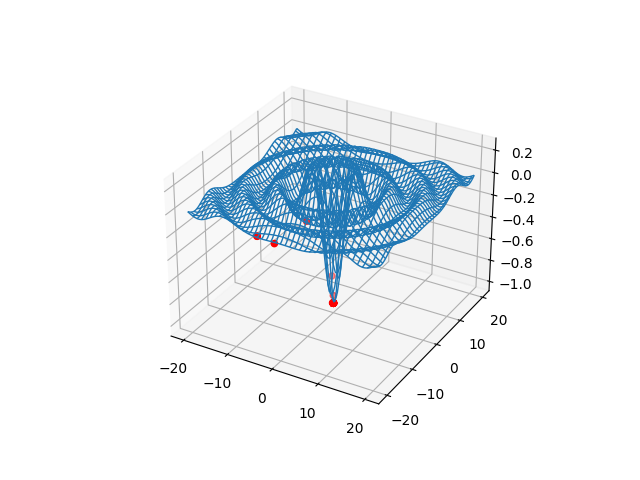

In [11]:
# membuat variabel baru dengan nama fig dan memiliki value plt.figure yang berarti untuk membuat figure
fig = plt.figure() 

ax = plt.axes(projection='3d')
# membuat variabel baru yaitu ax yang mana akan membuat sumbu x 

ax.plot_wireframe(X, Y, Z,linewidth=1) 
# untuk membuat plot 3 dimensi dengan besar garis 1

ax.scatter(G_posns[:,0], G_posns[:,1], G_costs,color='red',marker='o');
# membuat plot scatter di mana property setiap titik 

__Particle Swarm Optimization__ (PSO) merupakan metode komputasi yang mengoptimalkan masalah dengan mencoba secara iteratif untuk meningkatkan solusi calon dengan mengukur kualitas yang diberikan.

Jika kita lihat pada kode program yang tertera, terdapat beberapa langkah-langkah yang dapat kita lakukan untuk melakukan algoritma swarm :
1. Mendefinisikan masalah
2. Membuat paramater
3. Membuat Inisialisasi
4. Dan melakukan Perulangan utama

Ketika program ini dirunning ulang maka, akan terjadi perubahan animasi dari yang sebelumnya.
Running ulang yang dimaksud adalah running All cell